
2. Lakukan percobaan untuk mengetahui fitur-fitur yang paling optimal untuk digunakan. Fitur apa saja yang Anda gunakan untuk mendapatkan hasil terbaik?

3. Berdasarkan fitur yang telah Anda pilih pada soal nomor 2, berapa nilai  yang terbaik? Lampirkan grafika analisis dan alasan Anda.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Baca dataset
df = pd.read_csv("voice.csv")

In [ ]:
# 2. Encode label (male=1, female=0)
df['label'] = LabelEncoder().fit_transform(df['label'])

# 3. Pisahkan fitur dan target
X = df.drop('label', axis=1)
y = df['label']

# 4. Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


label       1.000000
IQR         0.618916
sp.ent      0.490552
sd          0.479539
sfm         0.357499
kurt        0.087195
Q75         0.066906
skew        0.036627
modindx     0.030801
minfun     -0.136692
maxfun     -0.166461
mode       -0.171775
meandom    -0.191067
dfrange    -0.192213
mindom     -0.194974
maxdom     -0.195657
median     -0.283919
centroid   -0.337415
meanfreq   -0.337415
Q25        -0.511455
meanfun    -0.833921
Name: label, dtype: float64


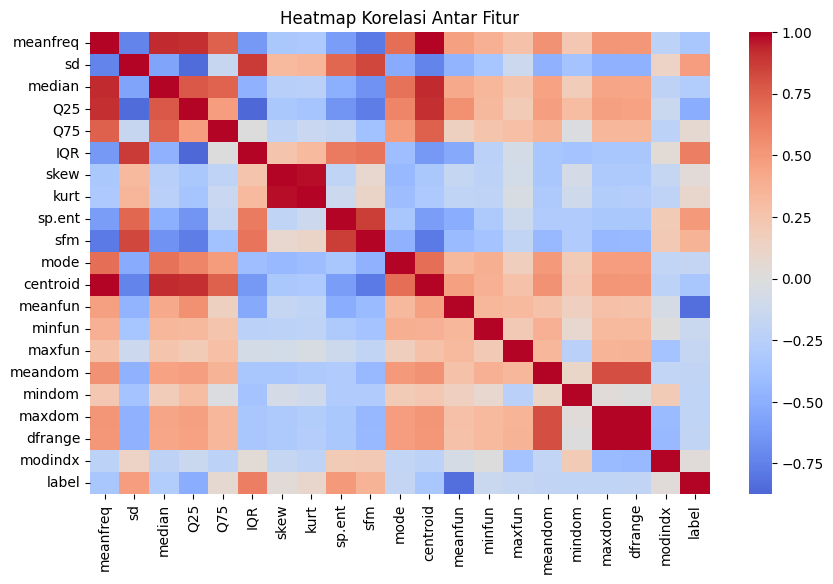

In [ ]:
# Eksperimen fitur penting
# Cek korelasi antar fitur dan label
corr = df.corr()['label'].sort_values(ascending=False)
print(corr)

# Visualisasi heatmap korelasi
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap='coolwarm', center=0)
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()


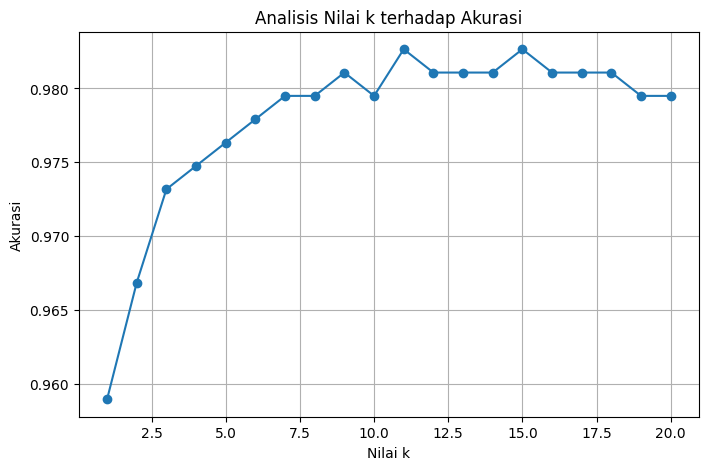

Nilai k terbaik: 11
Akurasi terbaik: 0.9826


In [ ]:
# Uji performa dengan fitur terpilih
# Pilih fitur optimal
selected_features = ['meanfreq', 'centroid', 'meanfun', 'IQR', 'sp.ent']
X_opt = df[selected_features]

# Normalisasi ulang
X_opt_scaled = scaler.fit_transform(X_opt)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_opt_scaled, y, test_size=0.2, random_state=42)

# Uji akurasi untuk beberapa nilai k
k_values = range(1, 21)
accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Visualisasi hasil
plt.figure(figsize=(8,5))
plt.plot(k_values, accuracies, marker='o')
plt.title('Analisis Nilai k terhadap Akurasi')
plt.xlabel('Nilai k')
plt.ylabel('Akurasi')
plt.grid(True)
plt.show()

# Cetak hasil terbaik
best_k = k_values[np.argmax(accuracies)]
best_acc = max(accuracies)
print(f"Nilai k terbaik: {best_k}")
print(f"Akurasi terbaik: {best_acc:.4f}")
